# 주식 데이터를 활용한 EDA project 

EDA는 **탐색적 데이터 분석**으로 분석에 들어가기에 앞서 데이터 분석가가 데이터를 다양한 각도에서 관찰하고 직관적으로 이해하기 위한 데이터 분석입니다. 이번 프로젝트는 주식 뉴스 기사 데이터에 대한 EDA를 pandas를 이용하여 수행하는 프로젝트입니다. EDA 와 Pandas는 데이터 분석가의 눈과 귀이라고 해도 과언이 아니기 때문에 본 프로젝트를 통해 Pandas의 기능을 이용하여 간단하게 데이터에서의 유의미한 패턴과 분포를 찾아내고 시각화하는것에 중점을 두었습니다.

EDA는 정해진 답을 찾아내는 것은 아닙니다. 데이터의 유의미한 패턴 및 내제되어 있는 의미를 찾아내는 과정 모두가 EDA 입니다.

## 1. Import Library

데이터 분석을 위한 기본적인 라이브러리를 import합니다. 그리고 분석을 하려는 데이터를 살펴보겠습니다. (데이터의 위치는 쥬피터 노트북과 같은 폴더내에, datasets이라는 폴더아래에 들어있습니다.)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  # Visualization을 위한 라이브러리입니다.
import matplotlib.pyplot as plt

import os
print(os.listdir("./datasets/"))

['state-areas.csv', 'state-abbrevs.csv', 'upload_DJIA_table.csv', 'state-population.csv']


`upload_DJIA_table.csv` 데이터를 로딩하고, 데이터의 처음 5개 row를 간단하게 출력해봅니다. 

In [2]:
df = pd.read_csv('./datasets/upload_DJIA_table.csv')
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


##  2. Summarize Data

Pandas의 함수를 활용하여 데이터의 기본적인 정보를 살펴봅니다. 특히 sum, mean, max, min, quantile 등은 데이터를 요약하는 measurement 입니다. 큰 데이터를 하나의 요약된 수치로 변경하여 데이터의 이해를 높이는 정보입니다.
- 함수 1 : DataFrame의 Index, Columns, Data types, Memory usage 정보
- 함수 2 : 행과 열의 수
- 함수 3 : 열의 이름
- 함수 4 : 데이터의 수 (행의 수)
- 함수 5 : 각 컬럼별 데이터의 총 합
- 함수 6 : 각 컬럼별 데이터의 평균
- 함수 7 : 각 컬럼별 데이터의 표준편차
- 함수 8 : 각 컬럼별 데이터의 1,2,3 사분위수
- 함수 9 : 각 컬럼별 데이터의 maximum 값
- 함수 10 : 각 컬럼의 통계치

In [3]:
# 함수 1 : DataFrame의 Index, Columns, Data types, Memory usage 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1989 non-null   object 
 1   Open       1989 non-null   float64
 2   High       1989 non-null   float64
 3   Low        1989 non-null   float64
 4   Close      1989 non-null   float64
 5   Volume     1989 non-null   int64  
 6   Adj Close  1989 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 108.9+ KB


In [4]:
# 함수 2 : 행과 열의 수
df.shape

(1989, 7)

In [5]:
# 함수 3 : 열의 이름
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
# 함수 4 : 데이터의 수 (행의 수)
df.count()

Date         1989
Open         1989
High         1989
Low          1989
Close        1989
Volume       1989
Adj Close    1989
dtype: int64

In [7]:
# 함수 5 : 각 컬럼별 데이터의 총 합
df.sum(axis = 0)

Date         2016-07-012016-06-302016-06-292016-06-282016-0...
Open                                               2.67702e+07
High                                               2.69337e+07
Low                                                2.65988e+07
Close                                               2.6778e+07
Volume                                            323831020000
Adj Close                                           2.6778e+07
dtype: object

마지막 3개 데이터에 대하여 `High` 컬럼의 합을 구해봅니다.

In [8]:
df.tail(3)

,Date,Open,High,Low,Close,Volume,Adj Close
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


In [9]:
np.sum(df.iloc[-3:,2])

35409.419922

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
# 함수 6 : 평균
df.mean()

Open            13459.12
High            13541.30
Low             13372.93
Close           13463.03
Volume      162810970.34
Adj Close       13463.03
dtype: float64

In [12]:
# 함수 7 : 표준편차
df.std()

Open            3143.28
High            3136.27
Low             3150.42
Close           3144.01
Volume      93923426.68
Adj Close       3144.01
dtype: float64

In [13]:
# 함수 8 : 1,2,3 사분위수
df.quantile()

Open            13022.05
High            13088.11
Low             12953.13
Close           13025.58
Volume      135170000.00
Adj Close       13025.58
Name: 0.5, dtype: float64

In [15]:
df.quantile([.25,.5,.75], axis=0)

,Open,High,Low,Close,Volume,Adj Close
0.25,10907.34,11000.98,10824.76,10913.38,100000000.00,10913.38
0.50,13022.05,13088.11,12953.13,13025.58,135170000.00,13025.58
0.75,16477.70,16550.07,16392.77,16478.41,192600000.00,16478.41


In [14]:
# 함수 9 : 최대값
df.max()

Date         2016-07-01
Open           18315.06
High           18351.36
Low            18272.56
Close          18312.39
Volume        674920000
Adj Close      18312.39
dtype: object

처음 5개의 데이터에 대하여 `Low` 컬럼의 maximum 값을 구해봅니다.

In [16]:
np.max(df.iloc[0:5,3])

17916.910156

In [17]:
# 함수 10 : 각 컬럼의 통계치
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.00,1989.00,1989.00,1989.00,1989.00,1989.00
mean,13459.12,13541.30,13372.93,13463.03,162810970.34,13463.03
std,3143.28,3136.27,3150.42,3144.01,93923426.68,3144.01
min,6547.01,6709.61,6469.95,6547.05,8410000.00,6547.05
25%,10907.34,11000.98,10824.76,10913.38,100000000.00,10913.38
50%,13022.05,13088.11,12953.13,13025.58,135170000.00,13025.58
75%,16477.70,16550.07,16392.77,16478.41,192600000.00,16478.41
max,18315.06,18351.36,18272.56,18312.39,674920000.00,18312.39


## 3. 상관관계

데이터의 상관관계를 분석하는 것은 중요한 분석과정입니다. 특성간의(feature) 상관관계를 분석하여 특성의 선형성을 발견할 수 있습니다. 또한 상관관계는 feature를 선택할 때 사용하는 중요한 지표중에 하나입니다. 상관관계를 테이블로 표현하는 방법과 시각화하여 표현하는 방법을 모두 살펴보겠습니다.

In [18]:
# (1) 상관관계를 DataFrame으로 표현하기
df.corr()

,Open,High,Low,Close,Volume,Adj Close
Open,1.00,1.00,1.00,1.00,-0.69,1.00
High,1.00,1.00,1.00,1.00,-0.69,1.00
Low,1.00,1.00,1.00,1.00,-0.70,1.00
Close,1.00,1.00,1.00,1.00,-0.69,1.00
Volume,-0.69,-0.69,-0.70,-0.69,1.00,-0.69
Adj Close,1.00,1.00,1.00,1.00,-0.69,1.00


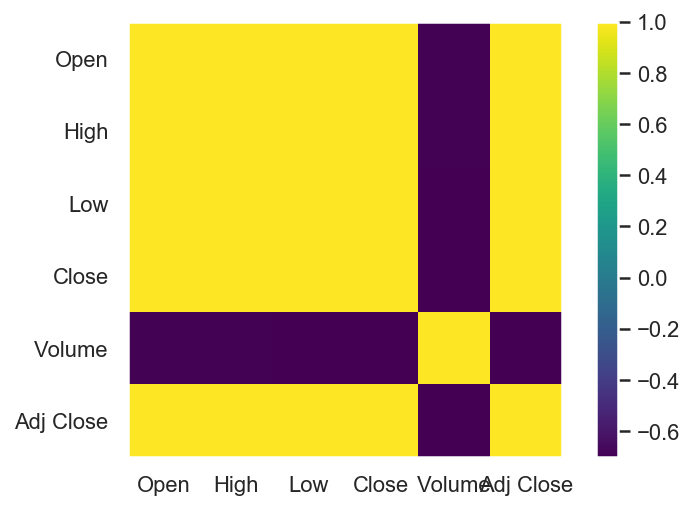

In [20]:
# (2). 상관관계를 DataFrame으로 표현하기
plt.imshow(df.corr(), cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(6), df.corr().columns.values)
plt.yticks(np.arange(6), df.corr().columns.values)
plt.grid()
plt.show()

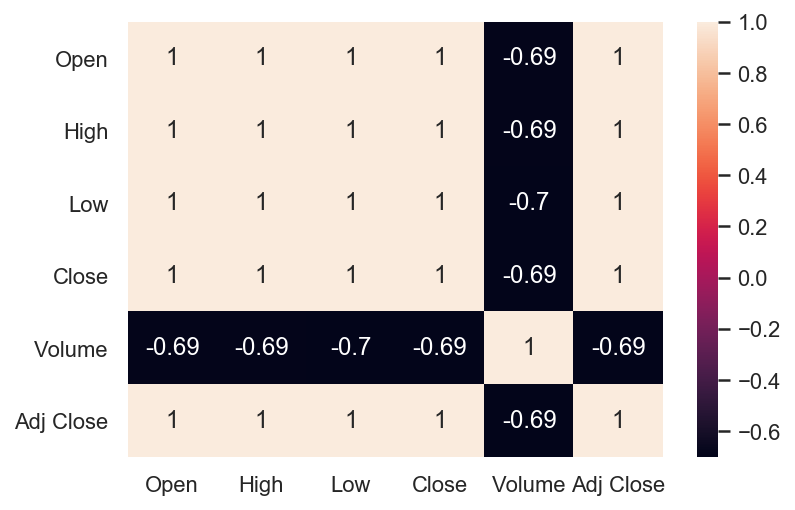

In [21]:
# seaborn을 활용하여 상관계수를 시각화해보기
import seaborn as sns
sns.heatmap(df.corr(), annot=True)
plt.grid()
plt.show()

# 데이터 분석 Project (2)

### 문제 : 주어진 데이터를 활용하여 2010년 인구 밀도 기준으로 미국 주와 지역 순위를 계산하세요. (인구 밀도의 내림차순)

필요한 데이터를 로딩합니다.

In [22]:
population = pd.read_csv('./datasets/state-population.csv')
areas = pd.read_csv('./datasets/state-areas.csv')
abbrevs = pd.read_csv('./datasets/state-abbrevs.csv')

간단하게 데이터를 확인하고 데이터의 shape을 확인합니다.

In [23]:
# 인구에 대한 데이터
population.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.00
1,AL,total,2012,4817528.00
2,AL,under18,2010,1130966.00
3,AL,total,2010,4785570.00
4,AL,under18,2011,1125763.00


In [24]:
# 넓이에 대한 데이터
areas.head()

,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


In [25]:
# 지역 약자에 대한 데이터
abbrevs.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [26]:
# 데이터의 shape
print(population.shape)
print(areas.shape)
print(abbrevs.shape)

(2544, 4)
(52, 2)
(51, 2)


Population 데이터에 State full name 데이터를 outer 조인 시킵니다. 왼쪽 dataframe의 키는 `state/region`이고 오른쪽 dataframe의 키는 `abbreviation`입니다.

In [43]:
merged = pd.merge(population, abbrevs, how='outer', \
                  left_on='state/region', right_on='abbreviation')

In [44]:
merged.head()

,state/region,ages,year,population,state,abbreviation
0,AL,under18,2012,1117489.00,Alabama,AL
1,AL,total,2012,4817528.00,Alabama,AL
2,AL,under18,2010,1130966.00,Alabama,AL
3,AL,total,2010,4785570.00,Alabama,AL
4,AL,under18,2011,1125763.00,Alabama,AL


Null 값을 체크합니다.

In [45]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
abbreviation     True
dtype: bool

State full name(컬럼명 : `state`)의 Null값을 확인합니다.

In [46]:
merged[merged['state'].isnull()].head()

,state/region,ages,year,population,state,abbreviation
2448,PR,under18,1990,nan,NaN,NaN
2449,PR,total,1990,nan,NaN,NaN
2450,PR,total,1991,nan,NaN,NaN
2451,PR,under18,1991,nan,NaN,NaN
2452,PR,total,1993,nan,NaN,NaN


PR 지역의 state 항목(full name)이 누락되어 있음을 볼 수 있습니다.

**Area 정보는 state의 full name을 사용하기 때문에, 누락된 값을 처리해야합니다.**

State full name 항목(컬럼명 : `state`)이 누락된 곳의 state/region을 살펴보겠습니다.

In [47]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

우리의 지식(사전 정보를 이용하면) 누락된 데이터를 쉽게 채워넣을 수 있습니다.

In [48]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

다시 한 번 null 값을 확인합니다.

In [49]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
abbreviation     True
dtype: bool

State full name에 null값이 없음을 확인했습니다. 따라서 다른 값에 null이 있어도 우선 넘어갑니다.

다음으로, area 정보가 있는 dataframe을 merge 합니다.

In [50]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
0,AL,under18,2012,1117489.00,Alabama,AL,52423.00
1,AL,total,2012,4817528.00,Alabama,AL,52423.00
2,AL,under18,2010,1130966.00,Alabama,AL,52423.00
3,AL,total,2010,4785570.00,Alabama,AL,52423.00
4,AL,under18,2011,1125763.00,Alabama,AL,52423.00


Null 값을 다시 확인해봅니다.

In [51]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
abbreviation      True
area (sq. mi)     True
dtype: bool

Area에 null 값이 존재합니다. 면적을 계산할 때 area 컬럼이 필요하기 때문에 null값이 존재하면 안됩니다.

어떤 값이 null값을 가지는지 확인해봅니다.

In [52]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

United States의 null 값을 다루는 방법은 2가지중 1개로 사용할 수 있습니다.
 - Area의 전체 합(미국 전체의 면적이므로)로 값을 채운다.
 - 지역별 인구밀도를 구하는 문제이므로(전체 면적에 대한 정보가 필요없으므로) 그 데이터를 삭제한다.
 
사실, 주어진 문제를 해결하기 위해서는 2번째 방법을 선택하면 됩니다.

In [53]:
final.dropna(inplace=True)

Null 값을 다시 한 번 확인합니다.

In [54]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
abbreviation     False
area (sq. mi)    False
dtype: bool

더 이상 null 값이 존재하지 않습니다. 2010 인구밀도를 계산하기 위해, year와 ages를 살펴보겠습니다.

In [55]:
final['year'].unique()

array([2012, 2010, 2011, 2009, 2013, 2007, 2008, 2005, 2006, 2004, 2003,
       2001, 2002, 1999, 2000, 1998, 1997, 1996, 1995, 1994, 1993, 1992,
       1991, 1990])

In [56]:
final['ages'].unique()

array(['under18', 'total'], dtype=object)

`2010`과 `전체 나이대(total)`에 대한 데이터를 가지고 옵니다.

In [57]:
data_2010 = final.query("year == 2010 & ages == 'total'")
data_2010.head()

,state/region,ages,year,population,state,abbreviation,area (sq. mi)
3,AL,total,2010,4785570.00,Alabama,AL,52423.00
91,AK,total,2010,713868.00,Alaska,AK,656425.00
101,AZ,total,2010,6408790.00,Arizona,AZ,114006.00
189,AR,total,2010,2922280.00,Arkansas,AR,53182.00
197,CA,total,2010,37333601.00,California,CA,163707.00


Index를 지정하여 최종결과값이 `Series`가 되어, key가 도시이름이 되도록 합니다.

In [58]:
data_2010.set_index('state', inplace=True)
data_2010.head()

,state/region,ages,year,population,abbreviation,area (sq. mi)
state,,,,,,
Alabama,AL,total,2010,4785570.00,AL,52423.00
Alaska,AK,total,2010,713868.00,AK,656425.00
Arizona,AZ,total,2010,6408790.00,AZ,114006.00
Arkansas,AR,total,2010,2922280.00,AR,53182.00
California,CA,total,2010,37333601.00,CA,163707.00


인구 밀도를 계산합니다. 

In [59]:
density = data_2010.population / data_2010['area (sq. mi)']
density.head()

state
Alabama       91.29
Alaska         1.09
Arizona       56.21
Arkansas      54.95
California   228.05
dtype: float64

인구 밀도 순서대로 정렬하도록 합니다.

In [60]:
density.sort_values(ascending=False, inplace=True)
density.head()  # 인구밀도가 높은 지역

state
District of Columbia   8898.90
New Jersey             1009.25
Rhode Island            681.34
Connecticut             645.60
Massachusetts           621.82
dtype: float64